# Sales Performance Analysis


# Understanding the Business - The Objective of the Project
Conduct a comprehensive analysis of sales data to determine the factors influencing performance and to identify the key drivers of exceptional sales outcomes.

# Project Background
Every business wants to know how sales, stock, and profitability evolve over time. By analyzing transaction data, businesses can monitor sales trends, manage inventory efficiently, and track costs.

# Project Objective
•	Understand monthly sales performance
•	Track how stock levels impact sales
•	Calculate profit margins from Net Sales – COGS
•	Build dashboards (eventually in Power BI) to communicate insights

# Question
1. How do Net Sales, Stock Qty, and COGS change over time, and what insights can we draw about profitability and inventory management?
2. What are the monthly sales trends?
3. What is the relationship between stock levels and sales?
4. How does profitability (Net Sales – COGS) evolve monthly?
5. Which months have the highest and lowest profit margins?

# Data Understanding
Available Dataset:

Columns:
•	YearMonth → Period in YYYY-MM format
•	Net Sales → Total sales amount for the month
•	Stock Qty → Closing stock quantity (units)
•	COGS → Cost of Goods Sold for the month

# Data Dictionary Example:

Column	Description

YearMonth = Month of sales aggregated in YYYY-MM
Net Sales = Revenue generated in that month
Stock Qty = Remaining stock units at month end
COGS = Total cost of goods sold in that month





# Descriptive Analysis

In [58]:
# Import your toolkit

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import plotly.express as px

In [52]:
# Load the data
dataset = pd.read_csv("sales.csv")
dataset # display first and last rows of the dataset


,Item Code,Item Name,Item Group,Invoice,Status,Posting Date,Customer Name,Mode Of Payment,Company,Cost Center,Rate,Stock Qty,Stock UOM,Amount,COGS,Gross Profit,Margin %
0,Me30VITWEL05005,WELLBABY MULTI-VITAMIN DROPS 30ML,VITAMINS & SUPPLEMENTS,2.03E+19,Paid,31/07/2025,Walk In,Cash - East Legon - A&C,Prime Pharmacy Limited,Prime Pharmacy East Legon - A&C - PPL,196.61,1.00,Piece(s),2.654235e+02,196.61,68.8135,25.90%
1,Me30VITWEL05005,WELLBABY MULTI-VITAMIN DROPS 30ML,VITAMINS & SUPPLEMENTS,2.03E+19,Paid,26/07/2025,Walk In,Cash - East Legon - A&C,Prime Pharmacy Limited,Prime Pharmacy East Legon - A&C - PPL,196.61,1.00,Piece(s),2.654235e+02,196.61,68.8135,25.90%
2,Me30VITWEL05005,WELLBABY MULTI-VITAMIN DROPS 30ML,VITAMINS & SUPPLEMENTS,2.03E+19,Paid,25/07/2025,Walk In,Cash - Bawaleshie,Prime Pharmacy Limited,Prime Pharmacy Bawaleshie - PPL,196.61,1.00,Piece(s),2.654235e+02,196.61,68.8135,25.90%
3,Me30VITWEL05005,WELLBABY MULTI-VITAMIN DROPS 30ML,VITAMINS & SUPPLEMENTS,2.03E+19,Paid,07/07/2025,Walk In,Cash - Dzorwulu,Prime Pharmacy Limited,Prime Pharmacy Dzorwulu - PPL,196.61,1.00,Piece(s),2.654235e+02,196.61,68.8135,25.90%
4,Me30VITWEL05005,WELLBABY MULTI-VITAMIN DROPS 30ML,VITAMINS & SUPPLEMENTS,2.03E+19,Paid,17/06/2025,Walk In,Cash - East Legon - A&C,Prime Pharmacy Limited,Prime Pharmacy East Legon - A&C - PPL,196.61,1.00,Piece(s),2.654235e+02,196.61,68.8135,25.90%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141975,Me10PREMET02991,METHYLDOPA 250MG GENERIC,PRESCRIPTION,2.03E+19,Return,03/01/2025,Walk In,Cash - Airport Shell,Prime Pharmacy Limited,Prime Pharmacy Airport Shell - PPL,3.50,-60.00,Tablet(s),3.070000e+00,-210.00,213.0700,6940.40%
141976,Me10PREMET02983,METFORMIN DENK 500MG 100'S,PRESCRIPTION,2.03E+19,Return,24/01/2025,Walk In,Cash - Top Pill Pharmacy Tema C1,Prime Pharmacy Limited,Top Pill Pharmacy Tema C1 - PPL,1.93,-60.00,Tablet(s),1.541600e+00,-115.80,117.3416,7611.70%
141977,Me10PREMET02991,METHYLDOPA 250MG TAB GENERIC 100'S,PRESCRIPTION,2.03E+19,Return,24/01/2025,Walk In,Cash - Top Pill Pharmacy Tema C1,Prime Pharmacy Limited,Top Pill Pharmacy Tema C1 - PPL,4.14,-60.00,Tablet(s),3.070000e+00,-248.40,251.4700,8191.20%
141978,Me10PRECOL01123,COLCHICINE 500MG 100'S,PRESCRIPTION,2.03E+19,Return,17/01/2025,Walk In,MoMo - Top Pill Pharmacy Tema C1,Prime Pharmacy Limited,Top Pill Pharmacy Tema C1 - PPL,1.40,-100.00,Tablet(s),1.140000e+00,-140.00,141.1400,12380.70%


In [34]:
dataset.columns

Index(['Item Code', 'Item Name', 'Item Group', 'Invoice', 'Status',
       'Posting Date', 'Customer Name', 'Mode Of Payment', 'Company',
       'Cost Center', 'Rate', 'Stock Qty', 'Stock UOM', 'Amount', 'COGS',
       'Gross Profit', 'Margin %'],
      dtype='object')

In [35]:
dataset.head()

,Item Code,Item Name,Item Group,Invoice,Status,Posting Date,Customer Name,Mode Of Payment,Company,Cost Center,Rate,Stock Qty,Stock UOM,Amount,COGS,Gross Profit,Margin %
0,Me30VITWEL05005,WELLBABY MULTI-VITAMIN DROPS 30ML,VITAMINS & SUPPLEMENTS,2.03E+19,Paid,31/07/2025,Walk In,Cash - East Legon - A&C,Prime Pharmacy Limited,Prime Pharmacy East Legon - A&C - PPL,196.61,1.0,Piece(s),265.4235,196.61,68.8135,25.90%
1,Me30VITWEL05005,WELLBABY MULTI-VITAMIN DROPS 30ML,VITAMINS & SUPPLEMENTS,2.03E+19,Paid,26/07/2025,Walk In,Cash - East Legon - A&C,Prime Pharmacy Limited,Prime Pharmacy East Legon - A&C - PPL,196.61,1.0,Piece(s),265.4235,196.61,68.8135,25.90%
2,Me30VITWEL05005,WELLBABY MULTI-VITAMIN DROPS 30ML,VITAMINS & SUPPLEMENTS,2.03E+19,Paid,25/07/2025,Walk In,Cash - Bawaleshie,Prime Pharmacy Limited,Prime Pharmacy Bawaleshie - PPL,196.61,1.0,Piece(s),265.4235,196.61,68.8135,25.90%
3,Me30VITWEL05005,WELLBABY MULTI-VITAMIN DROPS 30ML,VITAMINS & SUPPLEMENTS,2.03E+19,Paid,07/07/2025,Walk In,Cash - Dzorwulu,Prime Pharmacy Limited,Prime Pharmacy Dzorwulu - PPL,196.61,1.0,Piece(s),265.4235,196.61,68.8135,25.90%
4,Me30VITWEL05005,WELLBABY MULTI-VITAMIN DROPS 30ML,VITAMINS & SUPPLEMENTS,2.03E+19,Paid,17/06/2025,Walk In,Cash - East Legon - A&C,Prime Pharmacy Limited,Prime Pharmacy East Legon - A&C - PPL,196.61,1.0,Piece(s),265.4235,196.61,68.8135,25.90%


In [40]:
dataset["Posting Date"] = pd.to_datetime(dataset["Posting Date"], dayfirst=True)


In [41]:
dataset["Net Sales"] = dataset.apply(lambda x: x["Amount"] if x["Status"] == "Paid" else 0, axis=1)
dataset.head()

,Item Code,Item Name,Item Group,Invoice,Status,Posting Date,Customer Name,Mode Of Payment,Company,Cost Center,Rate,Stock Qty,Stock UOM,Amount,COGS,Gross Profit,Margin %,Net Sales
0,Me30VITWEL05005,WELLBABY MULTI-VITAMIN DROPS 30ML,VITAMINS & SUPPLEMENTS,2.03E+19,Paid,2025-07-31,Walk In,Cash - East Legon - A&C,Prime Pharmacy Limited,Prime Pharmacy East Legon - A&C - PPL,196.61,1.0,Piece(s),265.4235,196.61,68.8135,25.90%,265.4235
1,Me30VITWEL05005,WELLBABY MULTI-VITAMIN DROPS 30ML,VITAMINS & SUPPLEMENTS,2.03E+19,Paid,2025-07-26,Walk In,Cash - East Legon - A&C,Prime Pharmacy Limited,Prime Pharmacy East Legon - A&C - PPL,196.61,1.0,Piece(s),265.4235,196.61,68.8135,25.90%,265.4235
2,Me30VITWEL05005,WELLBABY MULTI-VITAMIN DROPS 30ML,VITAMINS & SUPPLEMENTS,2.03E+19,Paid,2025-07-25,Walk In,Cash - Bawaleshie,Prime Pharmacy Limited,Prime Pharmacy Bawaleshie - PPL,196.61,1.0,Piece(s),265.4235,196.61,68.8135,25.90%,265.4235
3,Me30VITWEL05005,WELLBABY MULTI-VITAMIN DROPS 30ML,VITAMINS & SUPPLEMENTS,2.03E+19,Paid,2025-07-07,Walk In,Cash - Dzorwulu,Prime Pharmacy Limited,Prime Pharmacy Dzorwulu - PPL,196.61,1.0,Piece(s),265.4235,196.61,68.8135,25.90%,265.4235
4,Me30VITWEL05005,WELLBABY MULTI-VITAMIN DROPS 30ML,VITAMINS & SUPPLEMENTS,2.03E+19,Paid,2025-06-17,Walk In,Cash - East Legon - A&C,Prime Pharmacy Limited,Prime Pharmacy East Legon - A&C - PPL,196.61,1.0,Piece(s),265.4235,196.61,68.8135,25.90%,265.4235


In [49]:
# Total Net Sales
total_sales = dataset["Amount"].sum()

# Total Quantity Sold
total_qty = dataset["Stock Qty"].sum()

# Average Selling Price
avg_price = total_sales / total_qty

# Total COGS
total_cogs = dataset["COGS"].sum()

# Compute Gross Profit as Amount - COGS
dataset["Gross Profit"] = dataset["Amount"] - dataset["COGS"]

# Total Gross Profit
gross_profit = dataset["Gross Profit"].sum()

# Compute Gross Profit Margin
margin_pct = (gross_profit / total_sales) * 100

total_sales, total_qty, avg_price, gross_profit, margin_pct


(np.float64(22602283.832785584),
 np.float64(1091885.66),
 np.float64(20.70022957603966),
 np.float64(6000846.312308946),
 np.float64(26.54973433969739))

In [50]:
# Format with commas and 2 decimals
total_sales_fmt = f"₵{total_sales:,.2f}"
total_qty_fmt = f"{total_qty:,.0f} units"
avg_price_fmt = f"₵{avg_price:,.2f}"
gross_profit_fmt = f"₵{gross_profit:,.2f}"
margin_pct_fmt = f"{margin_pct:.2f}%"
total_cogs_fmt = f"₵{total_cogs:,.2f}"



total_sales_fmt, total_qty_fmt, avg_price_fmt, gross_profit_fmt, margin_pct_fmt, total_cogs_fmt

('₵22,602,283.83',
 '1,091,886 units',
 '₵20.70',
 '₵6,000,846.31',
 '26.55%',
 '₵5,811,507.89')

In [51]:
summary = pd.DataFrame({
    "Metric": ["Total Sales", "Total Quantity", "Average Price", "Total COGS", "Gross Profit", "Margin %"],
    "Value": [total_sales_fmt, total_qty_fmt, avg_price_fmt, total_cogs_fmt, gross_profit_fmt, margin_pct_fmt]
})

summary

,Metric,Value
0,Total Sales,"₵22,602,283.83"
1,Total Quantity,"1,091,886 units"
2,Average Price,₵20.70
3,Total COGS,"₵5,811,507.89"
4,Gross Profit,"₵6,000,846.31"
5,Margin %,26.55%


In [61]:
# Ensure dataset is a copy
dataset = dataset.copy()

# Convert Posting Date (DD/MM/YYYY format)
dataset.loc[:, "Posting Date"] = pd.to_datetime(
    dataset["Posting Date"], format="%d/%m/%Y", errors="raise"
)

# Create YearMonth column (YYYY-MM)
dataset.loc[:, "YearMonth"] = dataset["Posting Date"].dt.strftime("%Y-%m")

# Group by YearMonth for sales trend
monthly_sales = dataset.groupby("YearMonth", as_index=False)["Amount"].sum()

# Make pandas always show floats without scientific notation
pd.set_option("display.float_format", "{:,.2f}".format)

# Show results
print(monthly_sales.head())


  YearMonth       Amount
0   2025-01 2,162,897.09
1   2025-02 1,717,289.81
2   2025-03 1,752,517.14
3   2025-04 1,465,002.09
4   2025-05 1,509,923.56


In [62]:
#1. Key KPIs 
total_sales = dataset["Amount"].sum()
total_qty = dataset["Stock Qty"].sum()
avg_price = total_sales / total_qty

#2. Sales by Payment Mode
sales_by_payment = dataset.groupby("Mode Of Payment")["Amount"].sum().reset_index()

#3. Top 10 Items by Sales
top_items = dataset.groupby("Item Name")["Amount"].sum().nlargest(10).reset_index()

# 4. Monthly Sales Trend
dataset["YearMonth"] = dataset["Posting Date"].dt.to_period("M")
monthly_sales = dataset.groupby("YearMonth")["Amount"].sum().reset_index()

# 5. Format KPIs
kpi_summary = {
    "Total Sales": f"₵{total_sales:,.2f}",
    "Total Quantity Sold": f"{total_qty:,.0f} units",
    "Average Selling Price": f"₵{avg_price:,.2f}"
}

kpi_summary, sales_by_payment, top_items, monthly_sales


({'Total Sales': '₵11,812,354.20',
  'Total Quantity Sold': '545,943 units',
  'Average Selling Price': '₵21.64'},
                                       Mode Of Payment       Amount
 0                                Cash - Airport Shell 2,114,266.52
 1          Cash - Airport Shell, MoMo - Airport Shell    67,850.61
 2   Cash - Airport Shell, MoMo - Airport Shell, PO...     4,896.36
 3   Cash - Airport Shell, POS Stanbic - Airport Shell    38,104.87
 4                                     Cash - Ashaiman   533,574.48
 ..                                                ...          ...
 74                POS Stanbic - Tema C6 - Tiwaa House     1,660.25
 75                 POS Stanbic - Top Pill Pharmacy C2       842.81
 76                POS Stanbic - Top Pill Pharmacy C25     9,940.16
 77            POS Stanbic - Top Pill Pharmacy Tema C1     1,873.71
 78            POS Stanbic - Top Pill Pharmacy Tema C8     5,408.85
 
 [79 rows x 2 columns],
                                    Item Na

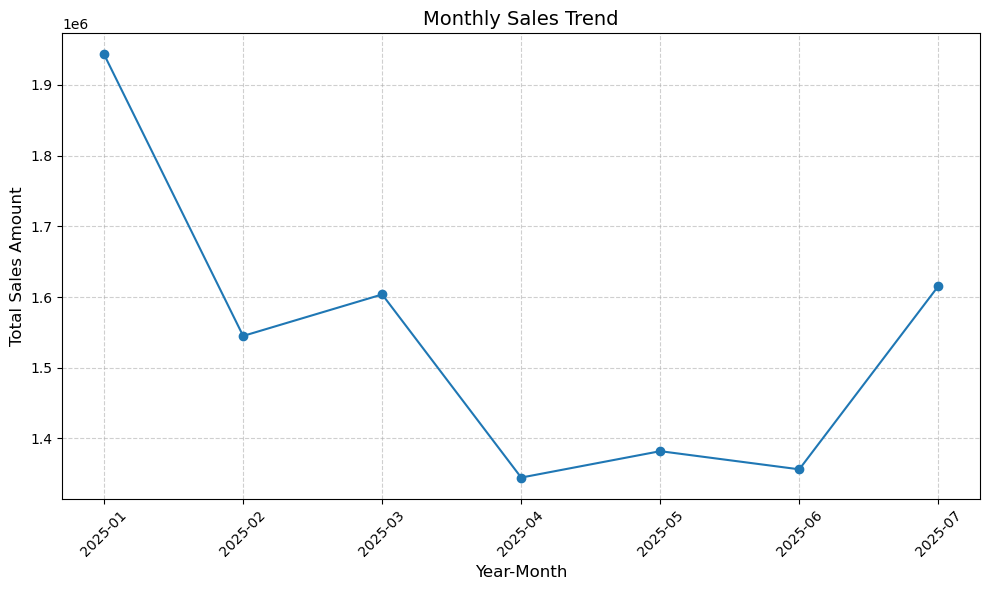

In [21]:
import matplotlib.pyplot as plt

# Ensure YearMonth is string, not Period
monthly_sales["YearMonth"] = monthly_sales["YearMonth"].astype(str)

# Plot sales trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales["YearMonth"], monthly_sales["Amount"], marker="o", linestyle="-")

# Titles and labels
plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Total Sales Amount", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add grid
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

In [63]:
print(dataset.columns.tolist())

['Item Code', 'Item Name', 'Item Group', 'Invoice', 'Status', 'Posting Date', 'Customer Name', 'Mode Of Payment', 'Company', 'Cost Center', 'Rate', 'Stock Qty', 'Stock UOM', 'Amount', 'COGS', 'Gross Profit', 'Margin %', 'YearMonth']


In [65]:
# Make sure Posting Date is a datetime
dataset["Posting Date"] = pd.to_datetime(dataset["Posting Date"], errors="coerce")

# Create YearMonth column in YYYY-MM format
dataset["YearMonth"] = dataset["Posting Date"].dt.to_period("M").astype(str)

# Aggregate by YearMonth, explicitly keeping Net Sales & Stock Qty
monthly_sales = (
    dataset.groupby("YearMonth")
           .agg({
               "Amount": "sum",
               "Stock Qty": "sum"
           })
           .reset_index()
)

print(monthly_sales.head())

  YearMonth       Amount  Stock Qty
0   2025-01 2,162,897.09  97,306.63
1   2025-02 1,717,289.81  80,301.33
2   2025-03 1,752,517.14  84,465.53
3   2025-04 1,465,002.09  71,146.00
4   2025-05 1,509,923.56  72,268.00


In [66]:
print(monthly_sales.columns)

Index(['YearMonth', 'Amount', 'Stock Qty'], dtype='object')


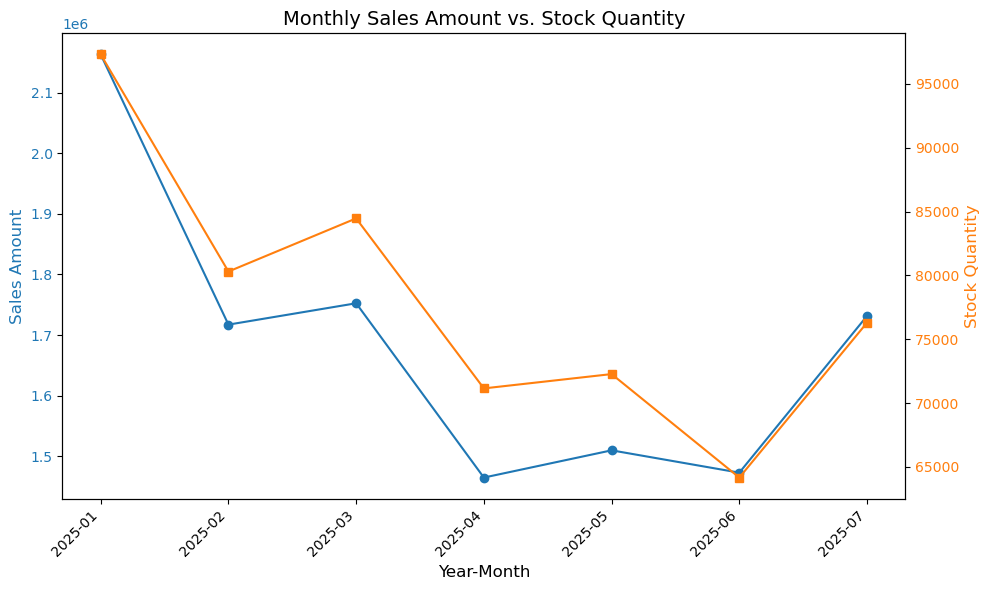

In [67]:
import matplotlib.pyplot as plt

# Ensure YearMonth is string for plotting
monthly_sales["YearMonth"] = monthly_sales["YearMonth"].astype(str)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Sales Amount
ax1.plot(monthly_sales["YearMonth"], monthly_sales["Amount"], marker="o", color="tab:blue", label="Sales Amount")
ax1.set_xlabel("Year-Month", fontsize=12)
ax1.set_ylabel("Sales Amount", color="tab:blue", fontsize=12)
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Secondary axis for Stock Qty
ax2 = ax1.twinx()
ax2.plot(monthly_sales["YearMonth"], monthly_sales["Stock Qty"], marker="s", color="tab:orange", label="Stock Qty")
ax2.set_ylabel("Stock Quantity", color="tab:orange", fontsize=12)
ax2.tick_params(axis="y", labelcolor="tab:orange")

# Title and layout
plt.title("Monthly Sales Amount vs. Stock Quantity", fontsize=14)
fig.autofmt_xdate(rotation=45)
fig.tight_layout()
plt.show()

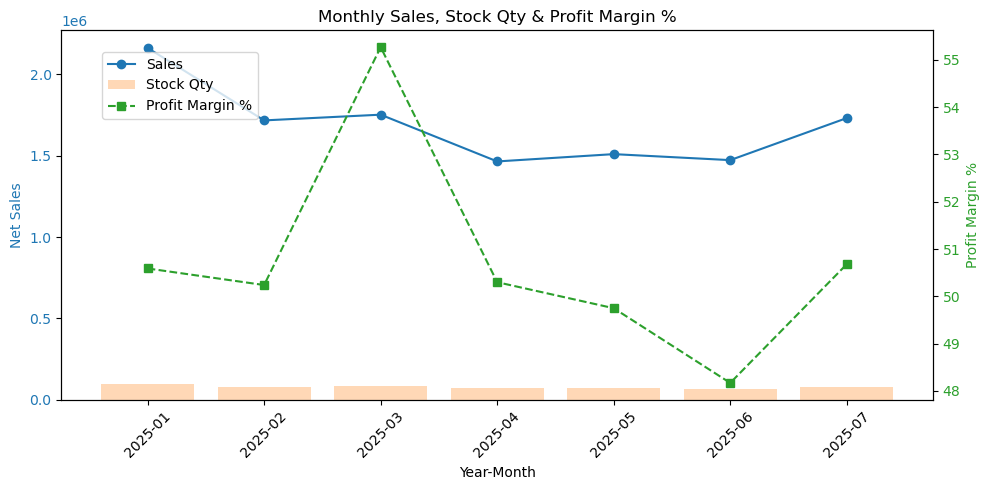

In [70]:
# Make sure Posting Date is a datetime
dataset["Posting Date"] = pd.to_datetime(dataset["Posting Date"], errors="coerce")

# Create YearMonth column in YYYY-MM format
dataset["YearMonth"] = dataset["Posting Date"].dt.to_period("M").astype(str)

# Aggregate by YearMonth 
monthly_sales = (
    dataset.groupby("YearMonth")
           .agg({
               "Amount": "sum",
               "Stock Qty": "sum",
               "COGS": "sum" 
           })
           .reset_index()
)

# Calculate Profit and Margin
monthly_sales["Gross Profit"] = monthly_sales["Amount"] - monthly_sales["COGS"]
monthly_sales["Profit Margin %"] = (
    monthly_sales["Gross Profit"] / monthly_sales["Amount"] * 100
).round(2)

# Visualization
fig, ax1 = plt.subplots(figsize=(10,5))

# Net Sales line
ax1.plot(monthly_sales["YearMonth"], monthly_sales["Amount"], 
         color="tab:blue", marker="o", label="Sales")
ax1.set_xlabel("Year-Month")
ax1.set_ylabel("Net Sales", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# ✅ Fix tick labels issue
plt.xticks(ticks=range(len(monthly_sales["YearMonth"])), 
           labels=monthly_sales["YearMonth"], rotation=45)

# Stock Qty as bar
ax1.bar(monthly_sales["YearMonth"], monthly_sales["Stock Qty"], 
        alpha=0.3, color="tab:orange", label="Stock Qty")

# Secondary y-axis for Profit Margin
ax2 = ax1.twinx()
ax2.plot(monthly_sales["YearMonth"], monthly_sales["Profit Margin %"], 
         color="tab:green", marker="s", linestyle="--", label="Profit Margin %")
ax2.set_ylabel("Profit Margin %", color="tab:green")
ax2.tick_params(axis="y", labelcolor="tab:green")

# Add legend
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.title("Monthly Sales, Stock Qty & Profit Margin %")
plt.tight_layout()
plt.show()


<bound method Axes.set of <Axes: >>

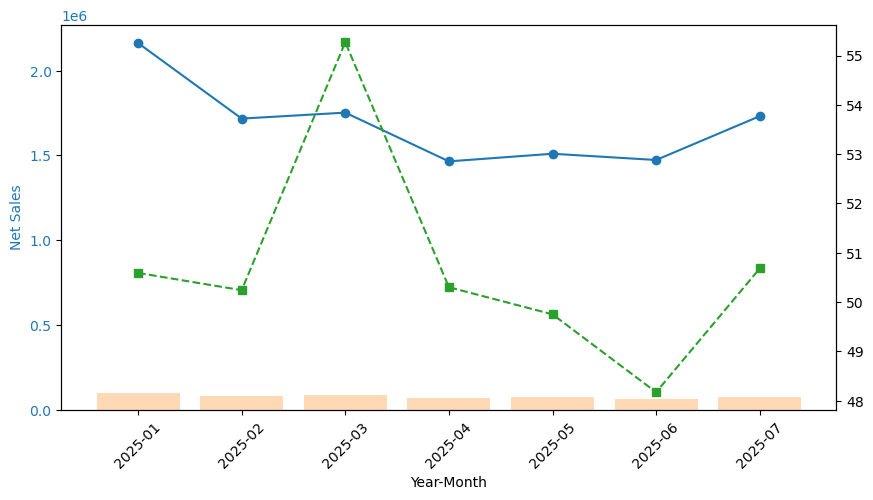

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Preparation

# Ensure Posting Date is datetime
dataset["Posting Date"] = pd.to_datetime(dataset["Posting Date"], errors="coerce")

# Create YearMonth column (YYYY-MM format)
dataset["YearMonth"] = dataset["Posting Date"].dt.to_period("M").astype(str)

# Aggregate by YearMonth
monthly_sales = (
    dataset.groupby("YearMonth")
           .agg({
               "Amount": "sum",
               "Stock Qty": "sum",
               "COGS": "sum"
           })
           .reset_index()
)

# Calculate Gross Profit & Profit Margin
monthly_sales["Gross Profit"] = monthly_sales["Amount"] - monthly_sales["COGS"]
monthly_sales["Profit Margin %"] = (
    monthly_sales["Gross Profit"] / monthly_sales["Amount"] * 100
).round(2)


# --- Visualization ---

fig, ax1 = plt.subplots(figsize=(10,5))

# Net Sales (line)
ax1.plot(
    monthly_sales["YearMonth"], 
    monthly_sales["Amount"], 
    color="tab:blue", marker="o", label="Net Sales"
)
ax1.set_xlabel("Year-Month")
ax1.set_ylabel("Net Sales", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Fix x-tick labels rotation (set ticks before labels)
ax1.set_xticks(range(len(monthly_sales["YearMonth"])))
ax1.set_xticklabels(monthly_sales["YearMonth"], rotation=45)

# Stock Qty (bar)
ax1.bar(
    range(len(monthly_sales["YearMonth"])), 
    monthly_sales["Stock Qty"], 
    alpha=0.3, color="tab:orange", label="Stock Qty"
)

# Secondary y-axis for Profit Margin %
ax2 = ax1.twinx()
ax2.plot(
    range(len(monthly_sales["YearMonth"])), 
    monthly_sales["Profit Margin %"], 
    color="tab:green", marker="s", linestyle="--", label="Profit Margin %"
)
ax2.set


In [79]:
# Total Gross Profit & Average Margin by Branch

# Step 1: Ensure Margin % is treated as string first, then clean
dataset['Margin %'] = dataset['Margin %'].astype(str).str.replace('%', '', regex=True)
dataset['Margin %'] = pd.to_numeric(dataset['Margin %'], errors='coerce')  # convert to float

# Step 2: Group by Cost Center and aggregate
branch_summary = dataset.groupby('Cost Center').agg({
    'Gross Profit': 'sum',
    'Margin %': 'mean'
}).reset_index()

# Step 3: Round Margin % for readability
branch_summary['Margin %'] = branch_summary['Margin %'].round(2)

# Step 4: Sort by Gross Profit descending
branch_summary = branch_summary.sort_values(by='Gross Profit', ascending=False).reset_index(drop=True)

branch_summary


,Cost Center,Gross Profit,Margin %
0,Prime Pharmacy Airport Shell - PPL,"1,895,061.46",42.88
1,Prime Pharmacy Bawaleshie - PPL,"1,129,253.57",41.83
2,Prime Pharmacy East Legon - A&C - PPL,"805,131.21",40.77
3,Prime Pharmacy Dzorwulu - PPL,"725,008.81",40.51
4,Nyaho Branch - PPL,"309,276.56",71.26
5,Prime Pharmacy Ashaiman - PPL,"256,441.72",41.49
6,Prime Pharmacy Tema C25 - PPL,"209,675.95",41.35
7,Prime Pharmacy Labone - PPL,"151,702.41",39.58
8,Top Pill Pharmacy Tema C1 - PPL,"131,609.67",57.13
9,Top Pill Pharmacy Tema C8 - PPL,"131,196.05",43.93


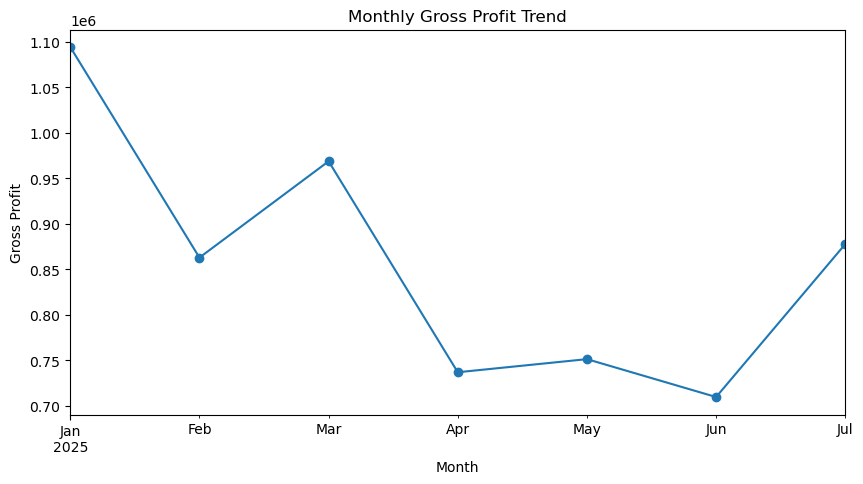

In [82]:
# Trend of Gross Profit Over Time

monthly_trend = dataset.groupby(dataset['Posting Date'].dt.to_period('M'))['Gross Profit'].sum()

monthly_trend.plot(kind='line', marker='o', figsize=(10,5))
plt.title("Monthly Gross Profit Trend")
plt.ylabel("Gross Profit")
plt.xlabel("Month")
plt.show()


In [84]:
# Best & Worst Performing Branch

best_branch = branch_summary.loc[branch_summary['Gross Profit'].idxmax()]
worst_branch = branch_summary.loc[branch_summary['Gross Profit'].idxmin()]

print("Best Branch:", best_branch['Cost Center'], "with Gross Profit:", best_branch['Gross Profit'])
print("Worst Branch:", worst_branch['Cost Center'], "with Gross Profit:", worst_branch['Gross Profit'])


Best Branch: Prime Pharmacy Airport Shell - PPL with Gross Profit: 1895061.461596613
Worst Branch: N/A - PPL with Gross Profit: 5172.66


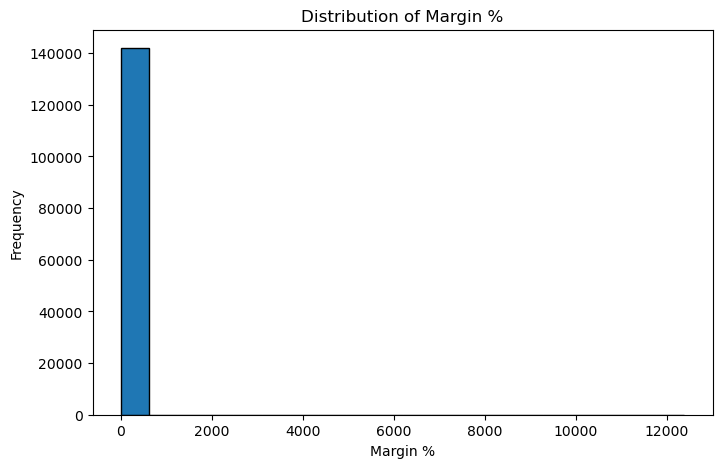

In [86]:
# Margin % Distribution

dataset['Margin %'].plot(kind='hist', bins=20, figsize=(8,5), edgecolor='black')
plt.title("Distribution of Margin %")
plt.xlabel("Margin %")
plt.show()


In [87]:
# Total Sales and Quantity by Product

# Group by Item Name to get total sales and quantity
sales_by_product = dataset.groupby("Item Name").agg({
    "Amount": "sum",
    "Stock Qty": "sum"
}).reset_index()

# Sort by Amount descending
sales_by_product = sales_by_product.sort_values(by="Amount", ascending=False)

# Show top 10 products
sales_by_product.head(10)


,Item Name,Amount,Stock Qty
935,COARTEM ORIG 80/480MG 6'S,"174,609.01","1,546.00"
1379,EASYLIFE VIT C & ZINC EFFERV. TAB,"149,361.21","2,505.00"
4286,ZITHROMAX CAP 250MG 6'S,"116,109.06",573.00
2204,LARIAM TABS 250MG 8'S,"114,407.00","1,087.00"
1694,GALVUS MET 50MG/1000MG TABS 60'S NOVARTIS,"108,843.83","10,493.00"
2564,MR Q CHINESE HERBAL MEDICINE LIQUID,"107,968.26","3,228.00"
1351,DUROMINE CAPS 30MG,"102,032.91","1,780.00"
336,AUGMENTIN 1G,"96,096.29",283.00
3995,VERMOX TABS 500MG,"86,375.81","3,330.00"
2348,LYRICA 75MG TAB 28'S,"85,420.40","3,771.00"


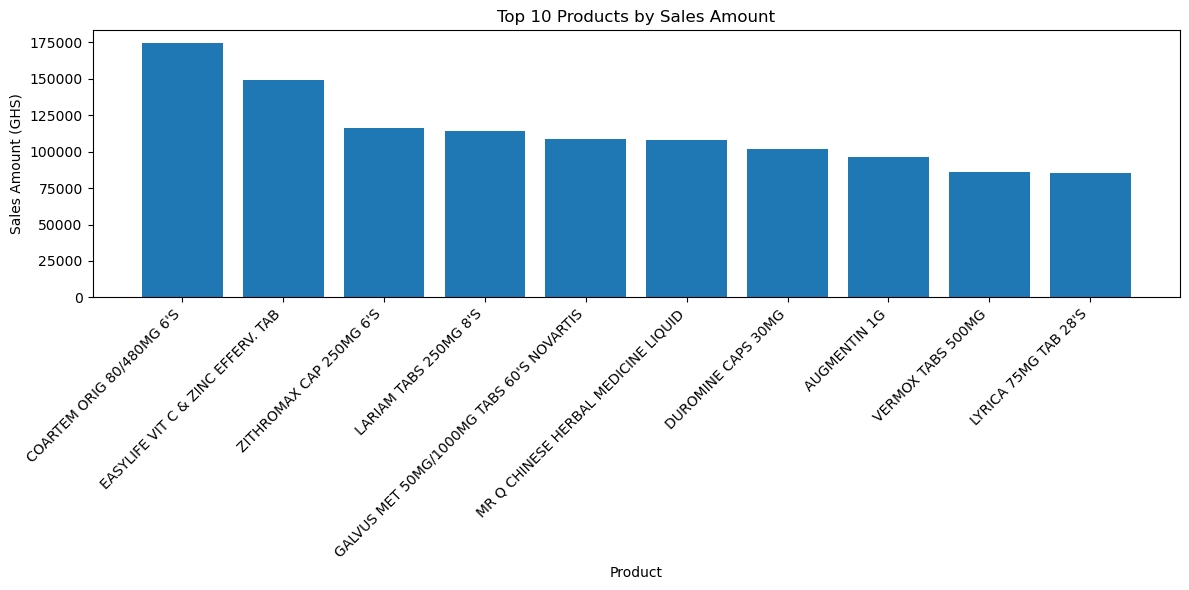

In [88]:
# Plot Top 10 Products by Sales

top_products = sales_by_product.head(10)

plt.figure(figsize=(12,6))
plt.bar(top_products["Item Name"], top_products["Amount"], color='tab:blue')
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Products by Sales Amount")
plt.ylabel("Sales Amount (GHS)")
plt.xlabel("Product")
plt.tight_layout()
plt.show()


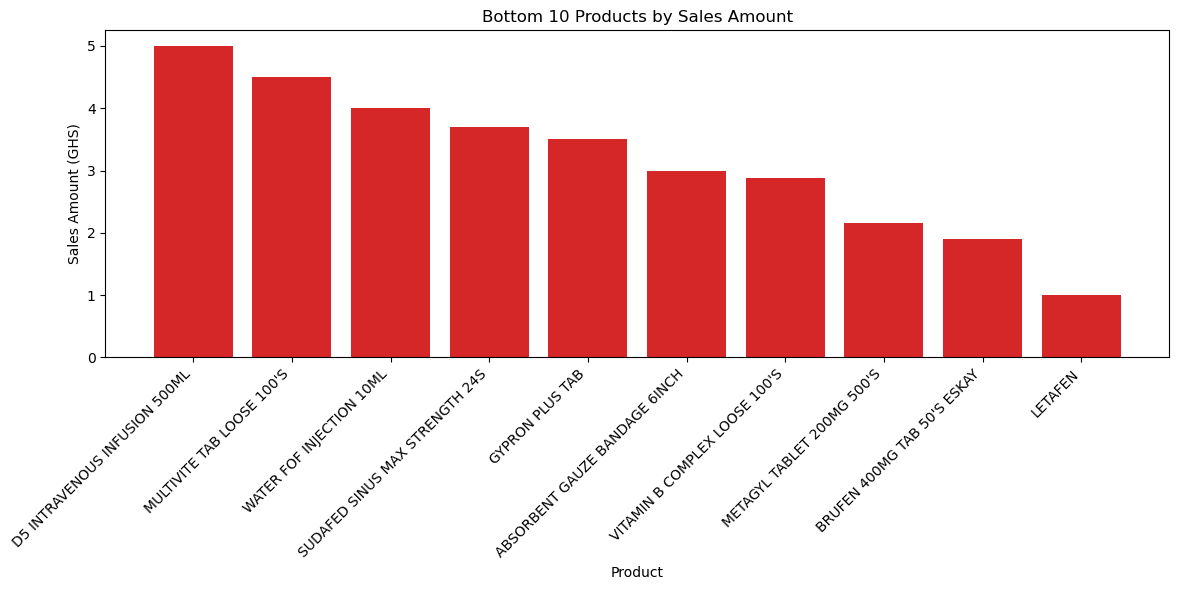

In [89]:
# Bottom 10 Products by Sales

bottom_products = sales_by_product.tail(10)

plt.figure(figsize=(12,6))
plt.bar(bottom_products["Item Name"], bottom_products["Amount"], color='tab:red')
plt.xticks(rotation=45, ha="right")
plt.title("Bottom 10 Products by Sales Amount")
plt.ylabel("Sales Amount (GHS)")
plt.xlabel("Product")
plt.tight_layout()
plt.show()


In [90]:
# Total Sales by Payment Method

# Group by Mode Of Payment
sales_by_payment = dataset.groupby("Mode Of Payment").agg({
    "Amount": "sum"
}).reset_index()

# Sort descending
sales_by_payment = sales_by_payment.sort_values(by="Amount", ascending=False)

# Show the results
sales_by_payment


,Mode Of Payment,Amount
0,Cash - Airport Shell,"2,114,266.52"
6,Cash - Bawaleshie,"1,227,868.84"
11,Cash - Dzorwulu,"939,205.03"
15,Cash - East Legon - A&C,"925,747.86"
68,POS Stanbic - Airport Shell,"823,506.87"
...,...,...
8,"Cash - Bawaleshie, MoMo - Bawaleshie, POS Stan...",309.24
9,"Cash - Bawaleshie, POS Cal Bank - Bawaleshie",250.53
20,"Cash - Labone, MoMo - Labone, POS Stanbic - La...",166.86
13,"Cash - Dzorwulu, MoMo - Dzorwulu, POS Stanbic ...",132.73


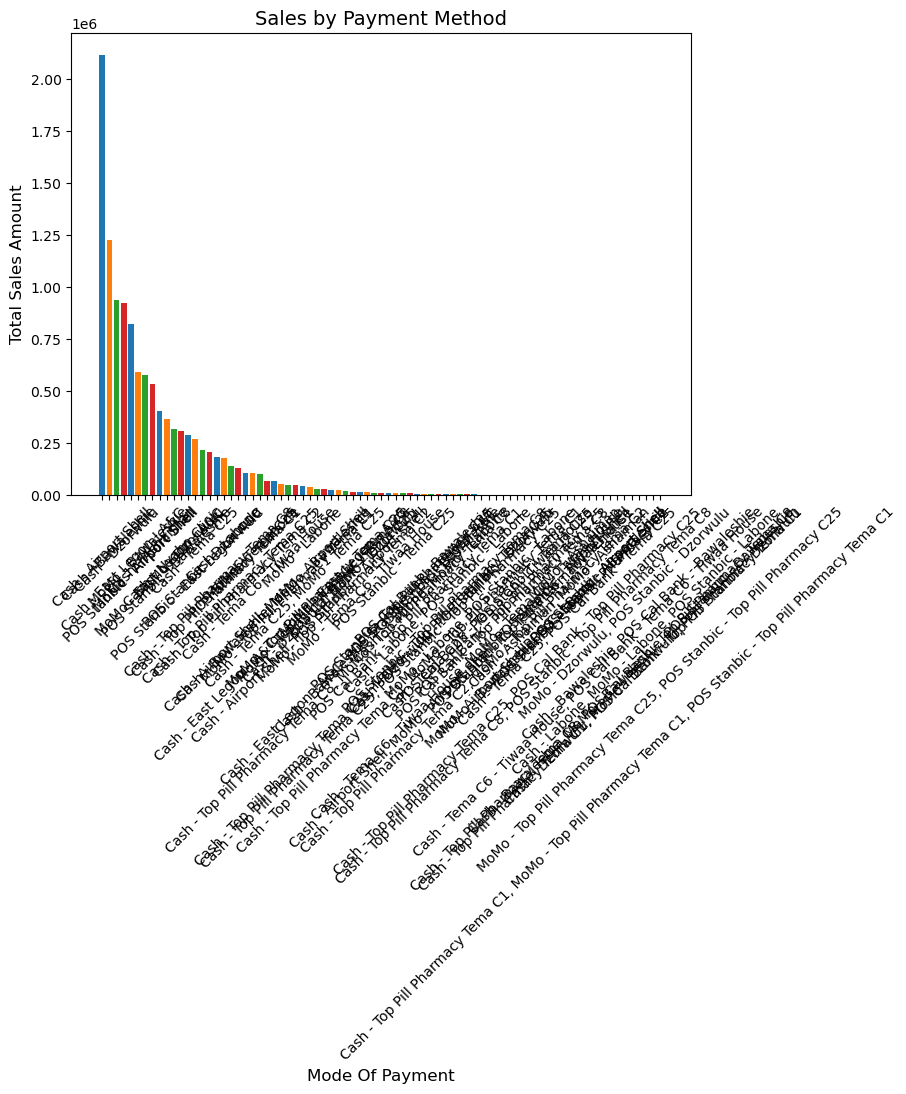

In [92]:
# Visualize Payment Method Split

# Bar chart
plt.figure(figsize=(8,6))
plt.bar(sales_by_payment["Mode Of Payment"], sales_by_payment["Amount"], color=['tab:blue','tab:orange','tab:green','tab:red'])
plt.xlabel("Mode Of Payment", fontsize=12)
plt.ylabel("Total Sales Amount", fontsize=12)
plt.title("Sales by Payment Method", fontsize=14)
plt.xticks(rotation=45)
plt.show()


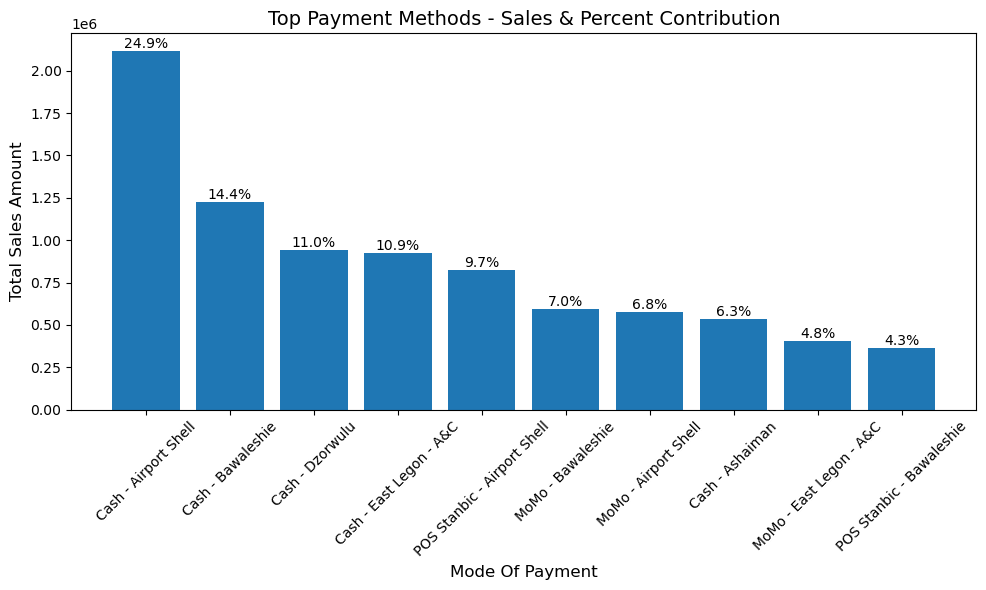

In [93]:
# Visualize Payment Method Split

# Sort descending and take top 10
top_payment = sales_by_payment.nlargest(10, "Amount")

# Calculate percentage of total
top_payment["Percent"] = (top_payment["Amount"] / top_payment["Amount"].sum()) * 100

# Plot bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(top_payment["Mode Of Payment"], top_payment["Amount"], color='tab:blue')

# Add percentage labels on top of each bar
for bar, pct in zip(bars, top_payment["Percent"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{pct:.1f}%', 
             ha='center', va='bottom', fontsize=10)

plt.xlabel("Mode Of Payment", fontsize=12)
plt.ylabel("Total Sales Amount", fontsize=12)
plt.title("Top Payment Methods - Sales & Percent Contribution", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [94]:
# Stock KPIs

# Stock on Sold per Item

# Total stock quantity per item
stock_on_hand = dataset.groupby("Item Name")["Stock Qty"].sum().reset_index().sort_values(by="Stock Qty", ascending=False)
stock_on_hand.head(10)  # show top 10


,Item Name,Stock Qty
211,AMLODIPINE 10MG TAB 28'S (UK ALL TYPES),"13,434.00"
2622,MYST BOTTLE WATER 500ML,"11,156.00"
1694,GALVUS MET 50MG/1000MG TABS 60'S NOVARTIS,"10,493.00"
1110,DECATYLEN LOZENGES,"9,121.00"
2456,METFORMIN DENK 500MG 100'S,"8,794.00"
2760,NIFECARD XL 30MG 30'S,"7,667.00"
3996,VERNA WATER 0.5L,"6,527.00"
1060,CRESTOR TABS 10MG 28'S,"5,260.00"
2625,NAKLOFEN DUO 75MG CAP,"4,909.00"
2813,NO 10 LIVER SALT,"4,905.00"


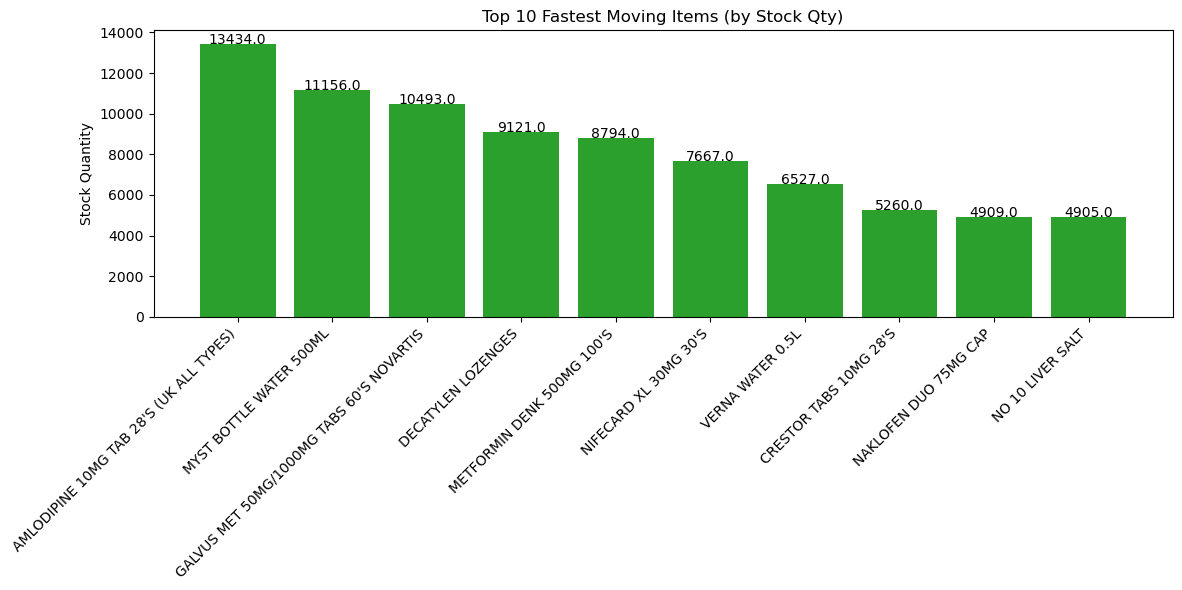

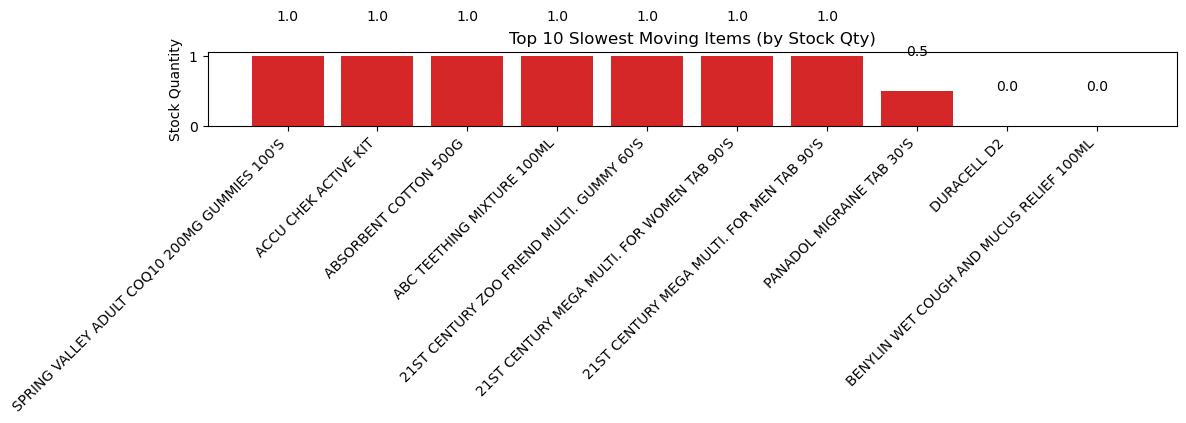

In [95]:
# Plot Top 10 Fastest and Slowest Moving Items

# Top 10 fastest moving items (highest stock qty)
top_10_fastest = stock_on_hand.head(10)

# Top 10 slowest moving items (lowest stock qty)
top_10_slowest = stock_on_hand.tail(10)

# Plot Fastest Moving Items
plt.figure(figsize=(12, 6))
plt.bar(top_10_fastest["Item Name"], top_10_fastest["Stock Qty"], color="tab:green")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Fastest Moving Items (by Stock Qty)")
plt.ylabel("Stock Quantity")
for i, v in enumerate(top_10_fastest["Stock Qty"]):
    plt.text(i, v + 0.5, str(round(v, 1)), ha="center")
plt.tight_layout()
plt.show()

# Plot Slowest Moving Items
plt.figure(figsize=(12, 6))
plt.bar(top_10_slowest["Item Name"], top_10_slowest["Stock Qty"], color="tab:red")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Slowest Moving Items (by Stock Qty)")
plt.ylabel("Stock Quantity")
for i, v in enumerate(top_10_slowest["Stock Qty"]):
    plt.text(i, v + 0.5, str(round(v, 1)), ha="center")
plt.tight_layout()
plt.show()


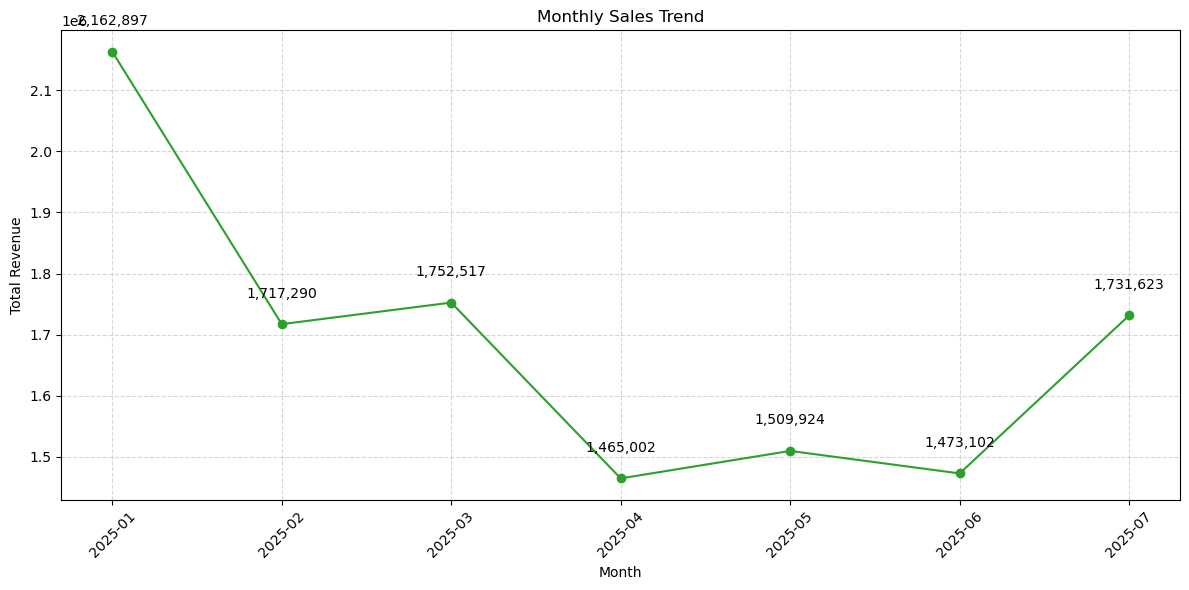

In [101]:
# Monthly Sales Trend

# Ensure Invoice Date is in datetime format
dataset["Posting Date"] = pd.to_datetime(dataset["Posting Date"])

# Extract Year-Month
dataset["YearMonth"] = dataset["Posting Date"].dt.to_period("M")

# Group sales by Year-Month
monthly_sales = dataset.groupby("YearMonth")["Amount"].sum().reset_index()

# Convert back to datetime for plotting
monthly_sales["YearMonth"] = monthly_sales["YearMonth"].astype(str)

# Plot Monthly Sales Trend
plt.figure(figsize=(12,6))
plt.plot(monthly_sales["YearMonth"], monthly_sales["Amount"], marker="o", linestyle="-", color="tab:green")

plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)

# Add value labels on each point
for i, val in enumerate(monthly_sales["Amount"]):
    plt.text(i, val + (0.02 * max(monthly_sales["Amount"])), f"{val:,.0f}", ha="center")

plt.tight_layout()
plt.show()


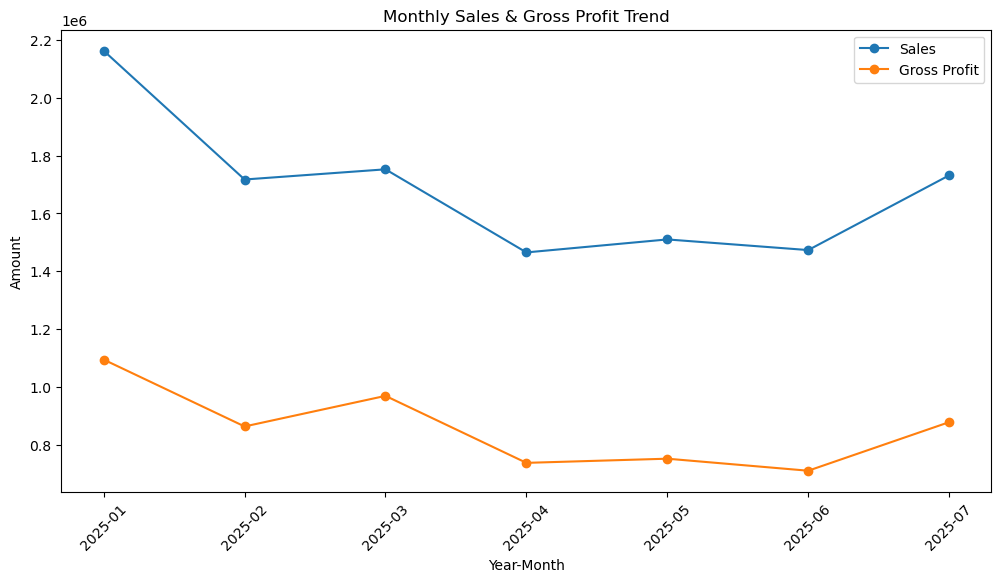

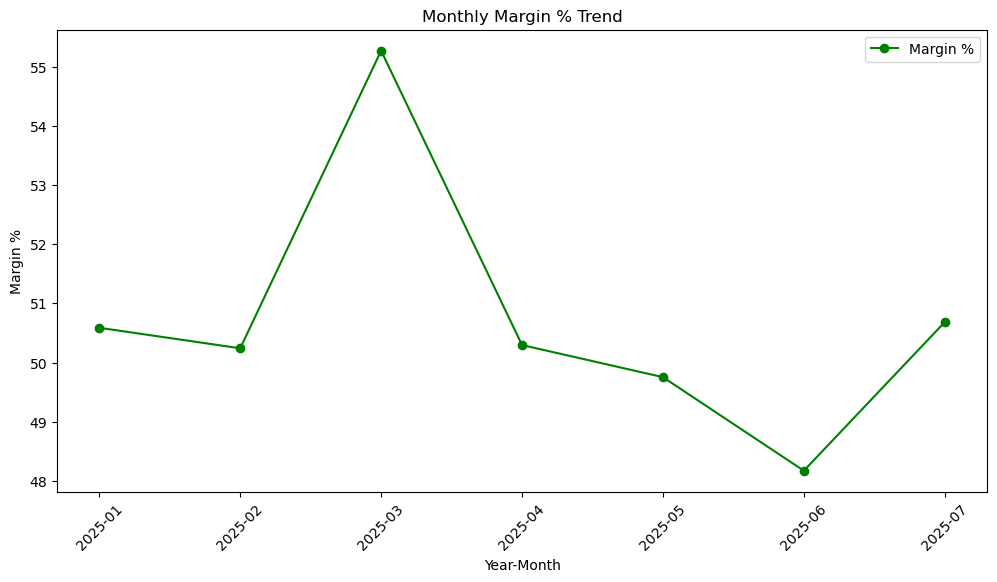

In [102]:
# Overall Monthly Profitability Trend

# 1. Track Sales (Amount), COGS, Gross Profit, and Margin % across months.

# Group by month
monthly_profitability = dataset.groupby("YearMonth").agg({
    "Amount": "sum",
    "COGS": "sum",
    "Gross Profit": "sum"
}).reset_index()

# Calculate Margin %
monthly_profitability["Margin %"] = (monthly_profitability["Gross Profit"] / monthly_profitability["Amount"]) * 100

# Plot sales and gross profit trend
plt.figure(figsize=(12,6))
plt.plot(monthly_profitability["YearMonth"].astype(str), monthly_profitability["Amount"], marker="o", label="Sales")
plt.plot(monthly_profitability["YearMonth"].astype(str), monthly_profitability["Gross Profit"], marker="o", label="Gross Profit")
plt.xticks(rotation=45)
plt.title("Monthly Sales & Gross Profit Trend")
plt.xlabel("Year-Month")
plt.ylabel("Amount")
plt.legend()
plt.show()

# Plot margin %
plt.figure(figsize=(12,6))
plt.plot(monthly_profitability["YearMonth"].astype(str), monthly_profitability["Margin %"], marker="o", color="green", label="Margin %")
plt.xticks(rotation=45)
plt.title("Monthly Margin % Trend")
plt.xlabel("Year-Month")
plt.ylabel("Margin %")
plt.legend()
plt.show()


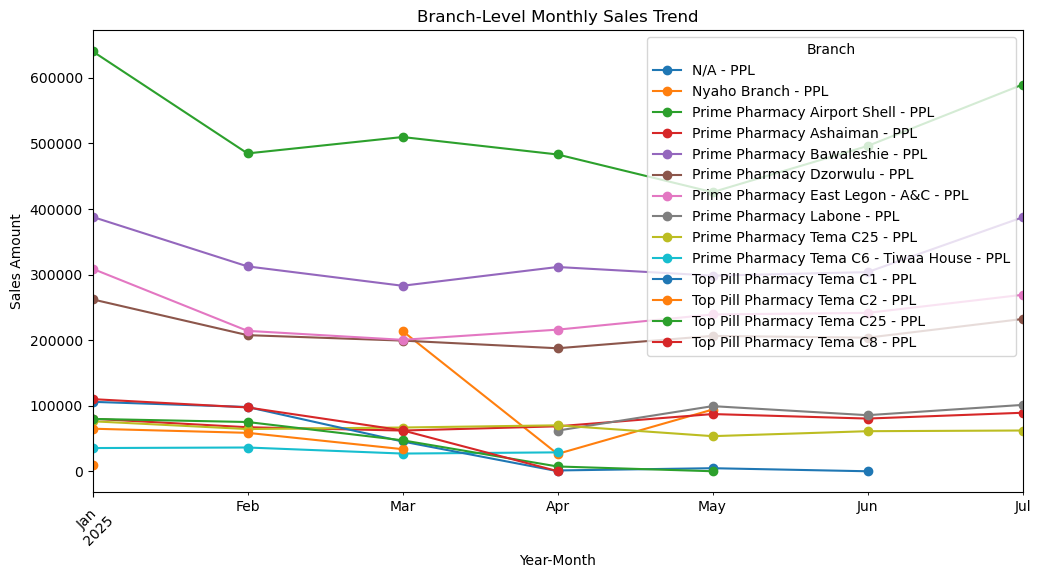

In [104]:
# 2. Branch-Level Monthly Sales Trend

# Group by YearMonth + Branch
branch_monthly_sales = dataset.groupby(["YearMonth", "Cost Center"]).agg({
    "Amount": "sum",
    "COGS": "sum",
    "Gross Profit": "sum"
}).reset_index()

branch_monthly_sales["Margin %"] = (branch_monthly_sales["Gross Profit"] / branch_monthly_sales["Amount"]) * 100

# Pivot for plotting sales
branch_sales_pivot = branch_monthly_sales.pivot(index="YearMonth", columns="Cost Center", values="Amount")

# Plot
branch_sales_pivot.plot(kind="line", figsize=(12,6), marker="o")
plt.title("Branch-Level Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45)
plt.legend(title="Branch")
plt.show()


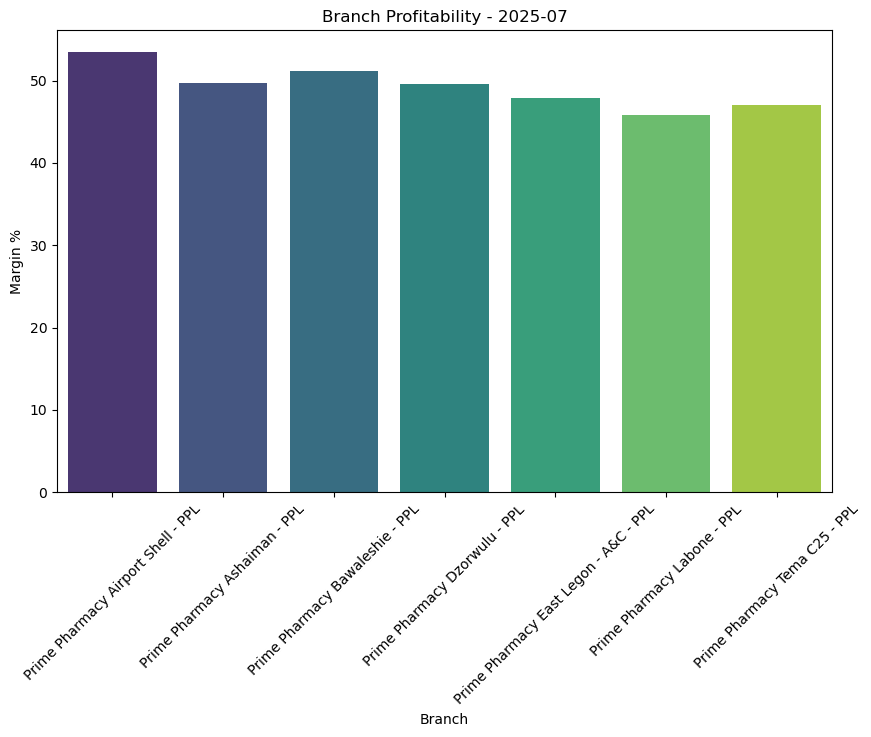

In [107]:
# 3. Branch Profitability Breakdown (Latest Month Snapshot)

import seaborn as sns
import matplotlib.pyplot as plt

# Branch-level profitability (latest month)
latest_month = dataset["YearMonth"].max()
branch_latest = dataset[dataset["YearMonth"] == latest_month] \
    .groupby("Cost Center")[["Gross Profit", "Amount"]] \
    .sum().reset_index()

branch_latest["Margin %"] = (branch_latest["Gross Profit"] / branch_latest["Amount"]) * 100

# Plot branch profitability for the latest month
plt.figure(figsize=(10,6))
sns.barplot(
    data=branch_latest,
    x="Cost Center",
    y="Margin %",
    hue="Cost Center",
    dodge=False,
    palette="viridis",
    legend=False
)
plt.title(f"Branch Profitability - {latest_month}")
plt.xlabel("Branch")
plt.ylabel("Margin %")
plt.xticks(rotation=45)
plt.show()




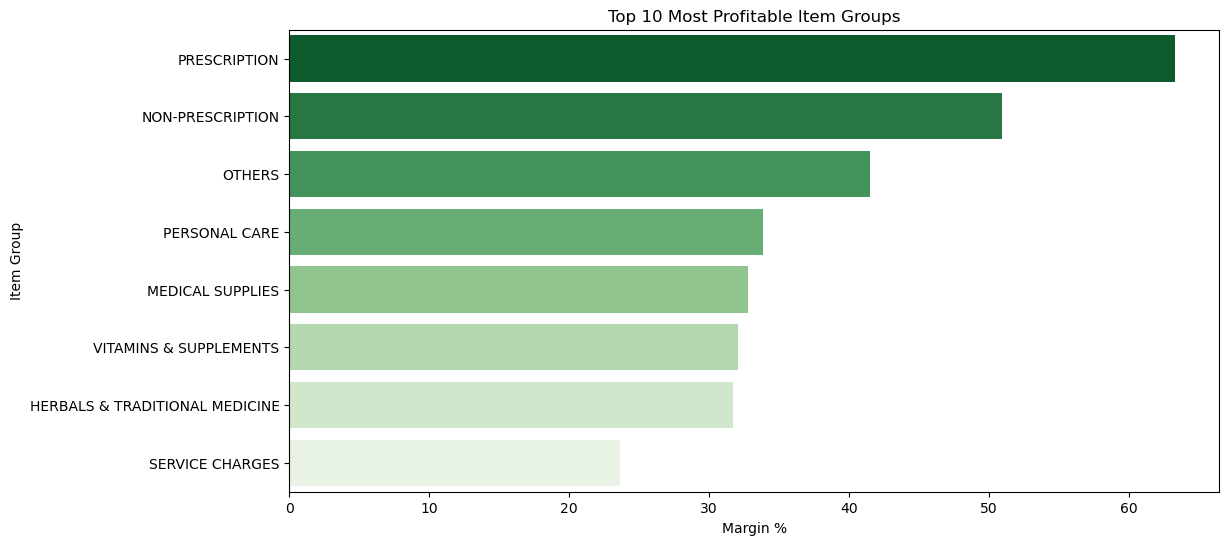

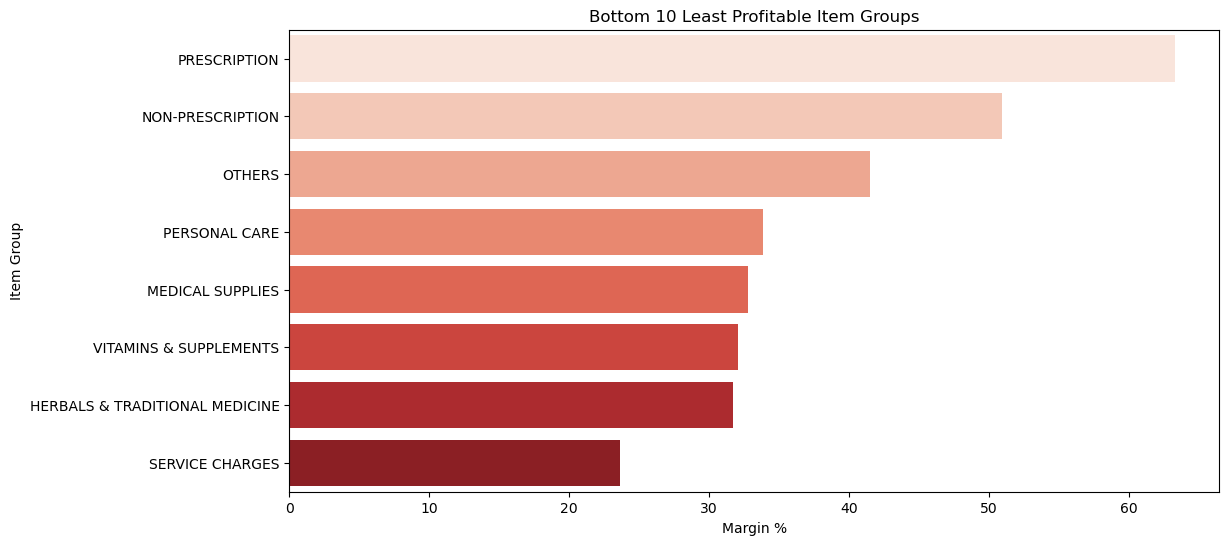

In [110]:
# Item Group profitability
item_group_profit = (
    dataset.groupby("Item Group")[["Gross Profit", "Amount", "COGS"]]
    .sum()
    .reset_index()
)

# Calculate Margin %
item_group_profit["Margin %"] = (
    item_group_profit["Gross Profit"] / item_group_profit["Amount"]
) * 100

# Sort to see best vs worst
item_group_profit = item_group_profit.sort_values("Margin %", ascending=False)

# Top 10 Most Profitable Item Groups
plt.figure(figsize=(12,6))
sns.barplot(
    data=item_group_profit.head(10),
    x="Margin %",
    y="Item Group",
    hue="Item Group",           # add this
    palette="Greens_r",
    legend=False                # disable duplicate legend
)
plt.title("Top 10 Most Profitable Item Groups")
plt.xlabel("Margin %")
plt.ylabel("Item Group")
plt.show()

# Bottom 10 Least Profitable Item Groups
plt.figure(figsize=(12,6))
sns.barplot(
    data=item_group_profit.tail(10),
    x="Margin %",
    y="Item Group",
    hue="Item Group",           # add this
    palette="Reds",
    legend=False
)
plt.title("Bottom 10 Least Profitable Item Groups")
plt.xlabel("Margin %")
plt.ylabel("Item Group")
plt.show()


In [130]:
print(group_trend.columns)


Index(['YearMonth', 'Item Group', 'Amount', 'Gross Profit'], dtype='object')


In [136]:
group_trend = dataset.groupby(["YearMonth", "Item Group", "Cost Center"])[["Gross Profit", "Amount"]].sum().reset_index()

# Now calculate margin %
group_trend["Margin %"] = group_trend["Gross Profit"] / group_trend["Amount"] * 100



KPI SUMMARY
Total Sales: 11,812,354.20
Total GP: 6,000,846.31
Overall Margin %: 50.80


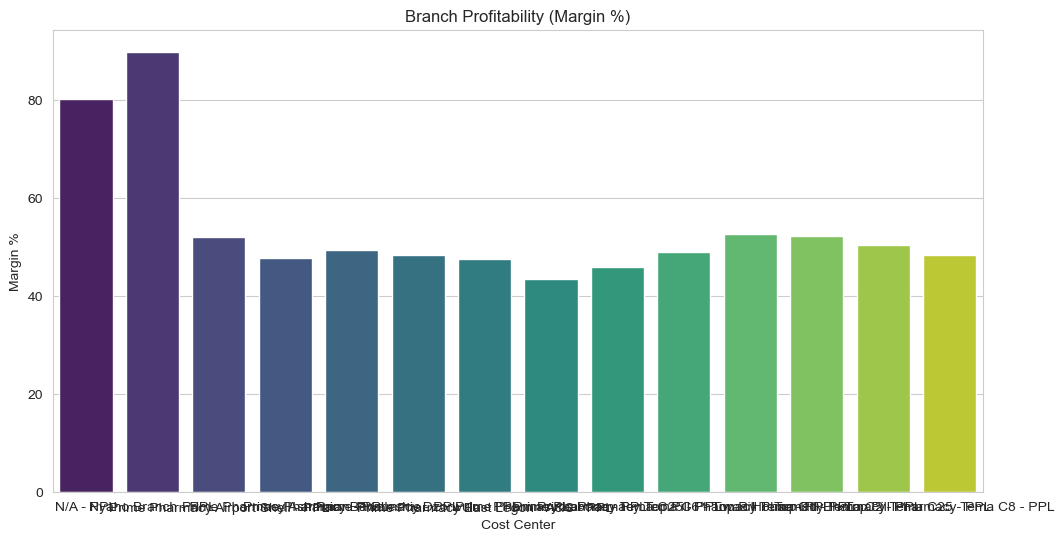

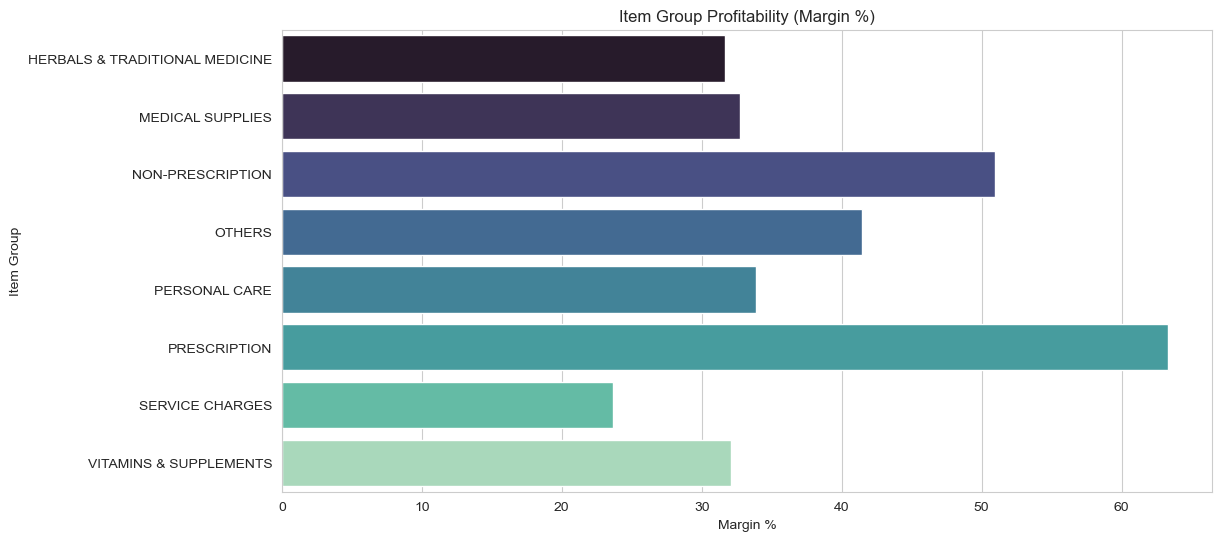

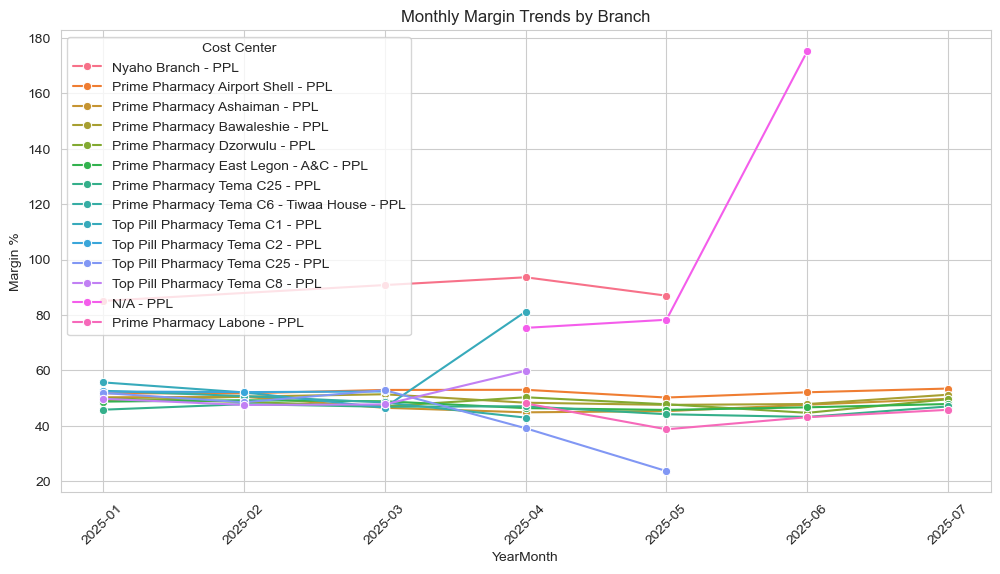

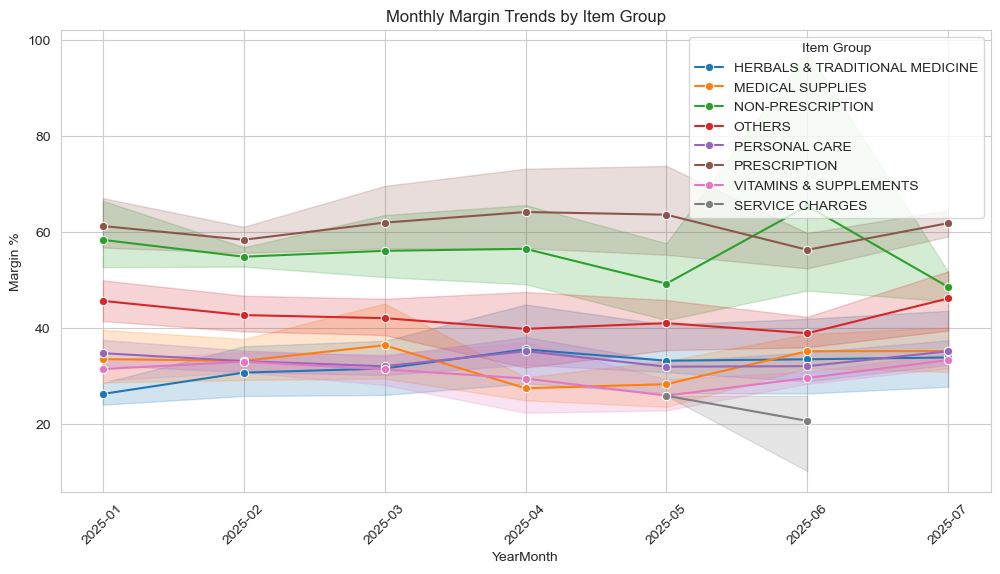

✅ Dashboard prototype complete. Ready to migrate to Power BI.


In [138]:
# Retail Sales Profitability Dashboard

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SETTINGS
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

# DATA PREP
# assume your cleaned dataset is already loaded as `dataset`
# and contains: Transaction Date, Branch, Item Group, Total Sales, Total Cost, Gross Profit, Margin %
dataset["YearMonth"] = pd.to_datetime(dataset["Posting Date"]).dt.to_period("M").astype(str)

#  1. KPI SUMMARY 
kpis = {
    "Total Sales": dataset["Amount"].sum(),
    "Total GP": dataset["Gross Profit"].sum(),
    "Overall Margin %": dataset["Gross Profit"].sum() / dataset["Amount"].sum() * 100,
}
print("KPI SUMMARY")
for k,v in kpis.items():
    print(f"{k}: {v:,.2f}")


# ---- 2. Branch Profitability ----
branch_latest = (
    dataset.groupby("Cost Center")[["Amount","Gross Profit"]].sum().reset_index()
)
branch_latest["Margin %"] = branch_latest["Gross Profit"]/branch_latest["Amount"]*100

sns.barplot(data=branch_latest, x="Cost Center", y="Margin %", hue="Cost Center", palette="viridis", legend=False)
plt.title("Branch Profitability (Margin %)")
plt.show()


# ---- 3. Item Group Profitability ----
group_latest = (
    dataset.groupby("Item Group")[["Amount","Gross Profit"]].sum().reset_index()
)
group_latest["Margin %"] = group_latest["Gross Profit"]/group_latest["Amount"]*100

sns.barplot(data=group_latest, y="Item Group", x="Margin %", hue="Item Group", palette="mako", legend=False)
plt.title("Item Group Profitability (Margin %)")
plt.show()


# ---- 4. Monthly Trends by Branch ----
branch_trend = (
    dataset.groupby(["YearMonth","Cost Center"])[["Amount","Gross Profit"]].sum().reset_index()
)
branch_trend["Margin %"] = branch_trend["Gross Profit"]/branch_trend["Amount"]*100

sns.lineplot(data=branch_trend, x="YearMonth", y="Margin %", hue="Cost Center", marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Margin Trends by Branch")
plt.show()


# ---- 5. Monthly Trends by Item Group ----
group_trend = dataset.groupby(["YearMonth", "Item Group", "Cost Center"])[["Gross Profit", "Amount"]].sum().reset_index()

# Now calculate margin %
group_trend["Margin %"] = group_trend["Gross Profit"] / group_trend["Amount"] * 100

sns.lineplot(data=group_trend, x="YearMonth", y="Margin %", hue="Item Group", marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Margin Trends by Item Group")
plt.show()


# ---- END ----
print("✅ Dashboard prototype complete. Ready to migrate to Power BI.")


In [139]:
dataset.to_csv("sales_profitability_clean.csv", index=False)
